<h2>This script is for internal developer testing.</h2>

This is different from the unit tests located in the `tests` directory.

In [1]:
import wfdb

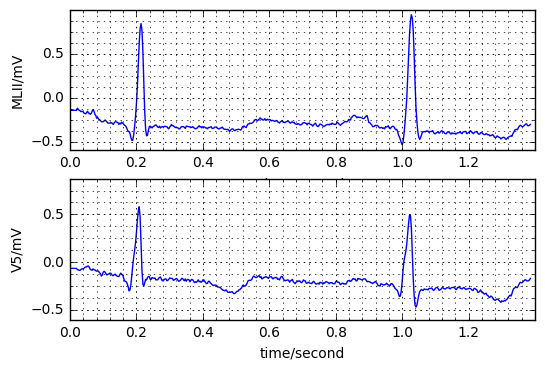

In [4]:
import wfdb
rec = wfdb.rdsamp('sampledata/100',  sampto=500)
wfdb.plotrec(rec,timeunits='seconds', ecggrids=True)

In [6]:
67142872/2/22525000

1.4904078135405106

In [7]:
67142872/2/1.5

22380957.333333332

In [8]:
(25*3600 + 1*60+ 40)* 250

22525000

In [ ]:
# Only get this many samples: 22380956+1

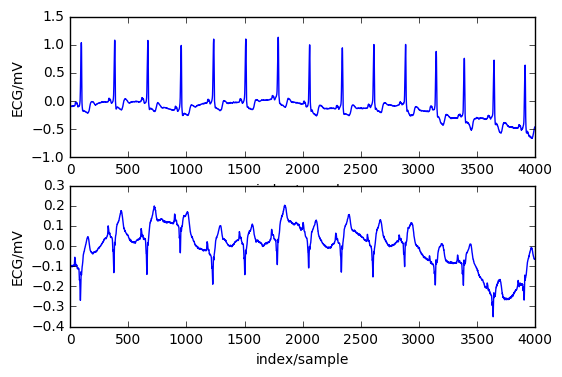

In [9]:
rec=wfdb.rdsamp('49', sampto=4000)
wfdb.plotrec(rec)

In [34]:
import matplotlib.pyplot as plt
import math
fig=plt.figure()
ax = fig.add_subplot(1,1,1) 
help(ax.set_xticks)

Help on method set_xticks in module matplotlib.axes._base:

set_xticks(ticks, minor=False) method of matplotlib.axes._subplots.AxesSubplot instance
    Set the x ticks with list of *ticks*
    
    ACCEPTS: sequence of floats



In [21]:
1.hasind()

SyntaxError: invalid syntax (<ipython-input-21-f664d103eca4>, line 1)

In [23]:
import numpy as np

np.arange(0, 99, 20)

array([ 0, 20, 40, 60, 80])

In [25]:
'Hello'.lower()

'hello'

In [26]:
raise Exception('sorry nope')

Exception: sorry nope

In [27]:
x=-8

In [28]:
x%5

2

In [41]:
def downround(x, base):
    return base * round(float(x)/base)

In [30]:

downround(x, 5)

-10

In [42]:
def upround(x, base):
    return base * math.ceil(float(x)/base)

In [43]:
upround(5, 5.5)

5.5

In [44]:
downround(6, 5.5)

5.5

In [45]:
np.arange(5.5, 10, 1)

array([ 5.5,  6.5,  7.5,  8.5,  9.5])